In [1]:
import quandl 
import pandas as pd
import numpy as np
import talib
from talib import MA_Type
import math
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
quandl.ApiConfig.api_key = 'ssi8y-zNkqeciXopzf-g'

In [3]:
symbol_list =['ACC','ADANIPORTS','ADANIPOWER','AJANTPHARM','ALBK','AMARAJABAT','AMBUJACEM','APOLLOHOSP','APOLLOTYRE','ARVIND','ASHOKLEY','ASIANPAINT','AUROPHARMA','AXISBANK','BAJAJ_AUTO','BAJAJFINSV','BAJFINANCE','BALKRISIND','BALRAMCHIN','BANKBARODA','BANKINDIA','BATAINDIA','BEL','BEML','BERGEPAINT','BHARATFORG','BHARTIARTL','BHEL','BIOCON','BOSCHLTD','BPCL','BRITANNIA','CADILAHC','CANBK','CANFINHOME','CAPF','CASTROLIND','CEATLTD','CENTURYTEX','CESC','CHENNPETRO','CHOLAFIN','CIPLA','COALINDIA','COLPAL','CONCOR','CUMMINSIND','DABUR','DALMIABHA','DCBBANK','DHFL','DISHTV','DIVISLAB','DLF','DRREDDY','EICHERMOT','ENGINERSIN','EQUITAS','ESCORTS','EXIDEIND','FEDERALBNK','GAIL','GLENMARK','GMRINFRA','GODFRYPHLP','GODREJCP','GODREJIND','GRANULES','GRASIM','GSFC','HAVELLS','HCC','HCLTECH','HDFC','HDFCBANK','HEROMOTOCO','HEXAWARE','HINDALCO','HINDPETRO','HINDUNILVR','HINDZINC','IBULHSGFIN','ICICIBANK','IDBI','IDEA','IDFC','IDFCBANK','IFCI','IGL','INDIACEM','INDIANB','INDIGO','INDUSINDBK','INFIBEAM','INFRATEL','INFY','IOC','IRB','ITC','JETAIRWAYS','JINDALSTEL','JISLJALEQS','JPASSOCIAT','JSWSTEEL','JUSTDIAL','KAJARIACER','KOTAKBANK','KPIT','KSCL','KTKBANK','LTFH','LICHSGFIN','LT','LUPIN','MM','MMFIN','MANAPPURAM','MARICO','MARUTI','MCDOWELL_N','MCX','MGL','MINDTREE','MOTHERSUMI','MRF','MRPL','MUTHOOTFIN','NATIONALUM','NBCC','NCC','NESTLEIND','NHPC','NIITTECH','NTPC','OFSS','OIL','ONGC','ORIENTBANK','PAGEIND','PCJEWELLER','PEL','PETRONET','PFC','PIDILITIND','PNB','PTC','PVR','RAMCOCEM','RAYMOND','RCOM','RECLTD','RELCAPITAL','RELIANCE','RELINFRA','REPCOHOME','RPOWER','SAIL','SBIN','SHREECEM','SIEMENS','SOUTHBANK','SREINFRA','SRF','SRTRANSFIN','STAR','SUNPHARMA','SUNTV','SUZLON','SYNDIBANK', 'TATACHEM','TATACOMM','TATAELXSI','TATAGLOBAL','TATAMOTORS','TATAMTRDVR','TATAPOWER','TATASTEEL','TCS','TECHM','TITAN','TORNTPHARM','TORNTPOWER','TV18BRDCST','WIPRO','ZEEL']
data = []  

for comp in symbol_list:    
    source = "NSE/" + comp  # To create the database and dataset name. Simply adding the company name to NSE database. 
    df = quandl.get(source, start_date='2018-06-07', end_date='2018-08-16')
    df['Stock'] = comp # add the company coloumn 
    data.append(df)  # keep on appending the df created.
final_data = pd.concat(data, axis=0)  # concatenate all the df's to have the final df

In [4]:
final_data.to_csv("stocks.csv")  # copying the data to csv file.

In [5]:
df = final_data.copy()
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Stock
Date,,,,,,,,
2018-06-07,1326.8,1337.80,1311.55,1315.0,1316.45,428248.0,5669.47,ACC
2018-06-08,1314.0,1325.55,1305.50,1312.4,1315.10,326601.0,4290.70,ACC
2018-06-11,1315.9,1338.80,1311.30,1319.7,1320.20,356878.0,4742.74,ACC
2018-06-12,1321.0,1329.35,1306.55,1317.1,1315.70,233538.0,3072.68,ACC
2018-06-13,1317.3,1349.40,1311.55,1330.2,1330.95,514188.0,6874.23,ACC


In [90]:
def indicator(df,symbol_list):
    df1 = df.copy()
    df_new = pd.DataFrame(columns= ['comp']  + [('ROC' + "_" + str(a+1)) for a in range(50)] + [('RSI' + "_" + str(a+1)) for a in range(50) ] + [('ATR' + "_" + str(a+1)) for a in range(50)] + [('ADX' + "_" + str(a+1)) for a in range(50)] +  [('CCI' + "_" + str(a+1)) for a in range(50)])  
    data = [] 
    for i , comp in enumerate(symbol_list):
        x = df1['Close'][df1['Stock'] == symbol_list[i]] 
        ROC = talib.ROC(x.values,timeperiod= 2)
        RSI = talib.RSI(x.values,timeperiod= 2 )
        ROC = [0 if math.isnan(x) else x for x in ROC]  
        RSI = [0 if math.isnan(x) else x for x in RSI] 
        x = df1[['High','Low','Close']][df1['Stock'] == symbol_list[i]]
        ATR =talib.ATR(x['High'].values, x['Low'].values, x['Close'].values, timeperiod=2)
        ADX = talib.ADX(x['High'].values, x['Low'].values, x['Close'].values, timeperiod=2)
        CCI = talib.CCI(x['High'].values, x['Low'].values, x['Close'].values, timeperiod=2)
        ATR = [0 if math.isnan(x) else x for x in ATR]
        ADX = [0 if math.isnan(x) else x for x in ADX]
        CCI = [0 if math.isnan(x) else x for x in CCI]
        
       
        df_new.loc[i] = [comp] + list (ROC)  + list(RSI)  + list(ATR) + list(ADX) + list(CCI)
        #print (df_new)
    data.append(df_new)
    final_df = pd.concat(data)
    return final_df

In [91]:
df_with_indicator =  indicator(df,symbol_list)

In [92]:
df_with_indicator.shape

(185, 251)

In [93]:
df_with_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Columns: 251 entries, comp to CCI_50
dtypes: float64(240), object(11)
memory usage: 364.2+ KB


In [94]:
df_with_indicator.to_csv("features set.csv") 

In [95]:
df_with_indicator.head()

,comp,ROC_1,ROC_2,ROC_3,ROC_4,ROC_5,ROC_6,ROC_7,ROC_8,ROC_9,ROC_10,ROC_11,ROC_12,ROC_13,ROC_14,ROC_15,ROC_16,ROC_17,ROC_18,ROC_19,ROC_20,ROC_21,ROC_22,ROC_23,ROC_24,ROC_25,ROC_26,ROC_27,ROC_28,ROC_29,ROC_30,ROC_31,ROC_32,ROC_33,ROC_34,ROC_35,ROC_36,ROC_37,ROC_38,ROC_39,ROC_40,ROC_41,ROC_42,ROC_43,ROC_44,ROC_45,ROC_46,ROC_47,ROC_48,ROC_49,ROC_50,RSI_1,RSI_2,RSI_3,RSI_4,RSI_5,RSI_6,RSI_7,RSI_8,RSI_9,RSI_10,RSI_11,RSI_12,RSI_13,RSI_14,RSI_15,RSI_16,RSI_17,RSI_18,RSI_19,RSI_20,RSI_21,RSI_22,RSI_23,RSI_24,RSI_25,RSI_26,RSI_27,RSI_28,RSI_29,RSI_30,RSI_31,RSI_32,RSI_33,RSI_34,RSI_35,RSI_36,RSI_37,RSI_38,RSI_39,RSI_40,RSI_41,RSI_42,RSI_43,RSI_44,RSI_45,RSI_46,RSI_47,RSI_48,RSI_49,RSI_50,ATR_1,ATR_2,ATR_3,ATR_4,ATR_5,ATR_6,ATR_7,ATR_8,ATR_9,ATR_10,ATR_11,ATR_12,ATR_13,ATR_14,ATR_15,ATR_16,ATR_17,ATR_18,ATR_19,ATR_20,ATR_21,ATR_22,ATR_23,ATR_24,ATR_25,ATR_26,ATR_27,ATR_28,ATR_29,ATR_30,ATR_31,ATR_32,ATR_33,ATR_34,ATR_35,ATR_36,ATR_37,ATR_38,ATR_39,ATR_40,ATR_41,ATR_42,ATR_43,ATR_44,ATR_45,ATR_46,ATR_47,ATR_48,ATR_49,ATR_50,ADX_1,ADX_2,ADX_3,ADX_4,ADX_5,ADX_6,ADX_7,ADX_8,ADX_9,ADX_10,ADX_11,ADX_12,ADX_13,ADX_14,ADX_15,ADX_16,ADX_17,ADX_18,ADX_19,ADX_20,ADX_21,ADX_22,ADX_23,ADX_24,ADX_25,ADX_26,ADX_27,ADX_28,ADX_29,ADX_30,ADX_31,ADX_32,ADX_33,ADX_34,ADX_35,ADX_36,ADX_37,ADX_38,ADX_39,ADX_40,ADX_41,ADX_42,ADX_43,ADX_44,ADX_45,ADX_46,ADX_47,ADX_48,ADX_49,ADX_50,CCI_1,CCI_2,CCI_3,CCI_4,CCI_5,CCI_6,CCI_7,CCI_8,CCI_9,CCI_10,CCI_11,CCI_12,CCI_13,CCI_14,CCI_15,CCI_16,CCI_17,CCI_18,CCI_19,CCI_20,CCI_21,CCI_22,CCI_23,CCI_24,CCI_25,CCI_26,CCI_27,CCI_28,CCI_29,CCI_30,CCI_31,CCI_32,CCI_33,CCI_34,CCI_35,CCI_36,CCI_37,CCI_38,CCI_39,CCI_40,CCI_41,CCI_42,CCI_43,CCI_44,CCI_45,CCI_46,CCI_47,CCI_48,CCI_49,CCI_50
0,ACC,0,0,0.284857,0.045624,0.814271,-0.646044,-2.167625,-0.520196,-1.347823,-1.937865,-1.128800,1.525251,3.582536,4.862318,-0.513093,-4.879935,2.376222,2.230224,-0.526159,2.325493,4.265296,1.691528,-1.000216,-0.196549,-1.108446,-1.531729,-1.683143,-6.159259,-3.685568,1.961558,-1.075018,0.100643,2.848176,14.114462,12.118554,3.198916,4.446637,-1.241216,-0.342020,1.832026,0.741951,-0.829334,-1.109597,1.316959,0.807087,2.086244,0.585823,-3.055865,1.181000,2.383845,0,0,79.069767,33.009709,86.461740,24.807656,18.991524,16.424401,4.665279,2.529030,1.681057,76.608631,89.807363,96.883486,37.100775,25.741233,72.534730,47.951168,63.751228,80.516560,93.497915,60.368009,63.740632,45.888866,20.675629,9.801672,4.392755,0.599520,34.796044,41.109604,20.613632,61.695414,80.807612,98.124542,92.213952,96.279030,97.004300,48.774474,71.962879,73.445193,83.850873,29.898150,46.350818,76.524719,64.827381,93.583556,42.384496,21.520352,71.783110,62.897181,0,0,23.775,23.2875,30.56875,29.734375,24.817188,25.383594,25.216797,24.208398,21.654199,32.602100,35.176050,45.513025,56.181512,51.240756,59.070378,43.260189,42.130095,34.940047,44.045024,43.622512,34.011256,33.505628,30.652814,38.226407,37.188203,59.319102,48.734551,39.767275,35.958638,32.654319,45.127159,116.538580,82.444290,78.397145,58.123572,47.386786,42.943393,40.321697,34.935848,40.517924,35.633962,35.816981,33.483491,37.091745,43.195873,37.997936,45.398968,38.549484,0,0,0,32.819612,54.590981,34.565293,37.481163,54.700090,69.685026,80.300759,87.859924,69.343600,75.930029,84.595375,64.076854,48.404891,48.074570,47.909410,32.846716,41.822861,64.970388,77.962568,84.458658,43.130968,51.714060,36.153966,39.698348,65.493230,78.844009,51.810915,52.199103,52.393197,58.356545,77.821282,87.553651,93.106115,95.976421,66.116821,38.963311,55.986224,34.852932,40.983599,28.383747,48.502909,42.168130,59.846717,71.945940,52.583769,53.369083,53.761740,0,-66.666667,66.666667,-66.666667,66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,66.666667,66.666667,66.666667,-66.666667,-66.666667,66.666667,-66.666667,66.666667,66.666667,66.666667,66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,66.666667,-66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,-66.66666

In [96]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_with_indicator.head()

,comp,ROC_1,ROC_2,ROC_3,ROC_4,ROC_5,ROC_6,ROC_7,ROC_8,ROC_9,ROC_10,ROC_11,ROC_12,ROC_13,ROC_14,ROC_15,ROC_16,ROC_17,ROC_18,ROC_19,ROC_20,ROC_21,ROC_22,ROC_23,ROC_24,ROC_25,ROC_26,ROC_27,ROC_28,ROC_29,ROC_30,ROC_31,ROC_32,ROC_33,ROC_34,ROC_35,ROC_36,ROC_37,ROC_38,ROC_39,ROC_40,ROC_41,ROC_42,ROC_43,ROC_44,ROC_45,ROC_46,ROC_47,ROC_48,ROC_49,ROC_50,RSI_1,RSI_2,RSI_3,RSI_4,RSI_5,RSI_6,RSI_7,RSI_8,RSI_9,RSI_10,RSI_11,RSI_12,RSI_13,RSI_14,RSI_15,RSI_16,RSI_17,RSI_18,RSI_19,RSI_20,RSI_21,RSI_22,RSI_23,RSI_24,RSI_25,RSI_26,RSI_27,RSI_28,RSI_29,RSI_30,RSI_31,RSI_32,RSI_33,RSI_34,RSI_35,RSI_36,RSI_37,RSI_38,RSI_39,RSI_40,RSI_41,RSI_42,RSI_43,RSI_44,RSI_45,RSI_46,RSI_47,RSI_48,RSI_49,RSI_50,ATR_1,ATR_2,ATR_3,ATR_4,ATR_5,ATR_6,ATR_7,ATR_8,ATR_9,ATR_10,ATR_11,ATR_12,ATR_13,ATR_14,ATR_15,ATR_16,ATR_17,ATR_18,ATR_19,ATR_20,ATR_21,ATR_22,ATR_23,ATR_24,ATR_25,ATR_26,ATR_27,ATR_28,ATR_29,ATR_30,ATR_31,ATR_32,ATR_33,ATR_34,ATR_35,ATR_36,ATR_37,ATR_38,ATR_39,ATR_40,ATR_41,ATR_42,ATR_43,ATR_44,ATR_45,ATR_46,ATR_47,ATR_48,ATR_49,ATR_50,ADX_1,ADX_2,ADX_3,ADX_4,ADX_5,ADX_6,ADX_7,ADX_8,ADX_9,ADX_10,ADX_11,ADX_12,ADX_13,ADX_14,ADX_15,ADX_16,ADX_17,ADX_18,ADX_19,ADX_20,ADX_21,ADX_22,ADX_23,ADX_24,ADX_25,ADX_26,ADX_27,ADX_28,ADX_29,ADX_30,ADX_31,ADX_32,ADX_33,ADX_34,ADX_35,ADX_36,ADX_37,ADX_38,ADX_39,ADX_40,ADX_41,ADX_42,ADX_43,ADX_44,ADX_45,ADX_46,ADX_47,ADX_48,ADX_49,ADX_50,CCI_1,CCI_2,CCI_3,CCI_4,CCI_5,CCI_6,CCI_7,CCI_8,CCI_9,CCI_10,CCI_11,CCI_12,CCI_13,CCI_14,CCI_15,CCI_16,CCI_17,CCI_18,CCI_19,CCI_20,CCI_21,CCI_22,CCI_23,CCI_24,CCI_25,CCI_26,CCI_27,CCI_28,CCI_29,CCI_30,CCI_31,CCI_32,CCI_33,CCI_34,CCI_35,CCI_36,CCI_37,CCI_38,CCI_39,CCI_40,CCI_41,CCI_42,CCI_43,CCI_44,CCI_45,CCI_46,CCI_47,CCI_48,CCI_49,CCI_50
0,ACC,0,0,0.284857,0.045624,0.814271,-0.646044,-2.167625,-0.520196,-1.347823,-1.937865,-1.128800,1.525251,3.582536,4.862318,-0.513093,-4.879935,2.376222,2.230224,-0.526159,2.325493,4.265296,1.691528,-1.000216,-0.196549,-1.108446,-1.531729,-1.683143,-6.159259,-3.685568,1.961558,-1.075018,0.100643,2.848176,14.114462,12.118554,3.198916,4.446637,-1.241216,-0.342020,1.832026,0.741951,-0.829334,-1.109597,1.316959,0.807087,2.086244,0.585823,-3.055865,1.181000,2.383845,0,0,79.069767,33.009709,86.461740,24.807656,18.991524,16.424401,4.665279,2.529030,1.681057,76.608631,89.807363,96.883486,37.100775,25.741233,72.534730,47.951168,63.751228,80.516560,93.497915,60.368009,63.740632,45.888866,20.675629,9.801672,4.392755,0.599520,34.796044,41.109604,20.613632,61.695414,80.807612,98.124542,92.213952,96.279030,97.004300,48.774474,71.962879,73.445193,83.850873,29.898150,46.350818,76.524719,64.827381,93.583556,42.384496,21.520352,71.783110,62.897181,0,0,23.775,23.2875,30.56875,29.734375,24.817188,25.383594,25.216797,24.208398,21.654199,32.602100,35.176050,45.513025,56.181512,51.240756,59.070378,43.260189,42.130095,34.940047,44.045024,43.622512,34.011256,33.505628,30.652814,38.226407,37.188203,59.319102,48.734551,39.767275,35.958638,32.654319,45.127159,116.538580,82.444290,78.397145,58.123572,47.386786,42.943393,40.321697,34.935848,40.517924,35.633962,35.816981,33.483491,37.091745,43.195873,37.997936,45.398968,38.549484,0,0,0,32.819612,54.590981,34.565293,37.481163,54.700090,69.685026,80.300759,87.859924,69.343600,75.930029,84.595375,64.076854,48.404891,48.074570,47.909410,32.846716,41.822861,64.970388,77.962568,84.458658,43.130968,51.714060,36.153966,39.698348,65.493230,78.844009,51.810915,52.199103,52.393197,58.356545,77.821282,87.553651,93.106115,95.976421,66.116821,38.963311,55.986224,34.852932,40.983599,28.383747,48.502909,42.168130,59.846717,71.945940,52.583769,53.369083,53.761740,0,-66.666667,66.666667,-66.666667,66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,66.666667,66.666667,66.666667,-66.666667,-66.666667,66.666667,-66.666667,66.666667,66.666667,66.666667,66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,-66.666667,66.666667,-66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,-66.66666

In [13]:
df_with_indicator.dtypes.eq(object)

comp       True
ROC_1      True
ROC_2      True
ROC_3     False
ROC_4     False
ROC_5     False
ROC_6     False
ROC_7     False
ROC_8     False
ROC_9     False
ROC_10    False
ROC_11    False
ROC_12    False
ROC_13    False
ROC_14    False
ROC_15    False
ROC_16    False
ROC_17    False
ROC_18    False
ROC_19    False
ROC_20    False
ROC_21    False
ROC_22    False
ROC_23    False
ROC_24    False
ROC_25    False
ROC_26    False
ROC_27    False
ROC_28    False
ROC_29    False
ROC_30    False
ROC_31    False
ROC_32    False
ROC_33    False
ROC_34    False
ROC_35    False
ROC_36    False
ROC_37    False
ROC_38    False
ROC_39    False
ROC_40    False
ROC_41    False
ROC_42    False
ROC_43    False
ROC_44    False
ROC_45    False
ROC_46    False
ROC_47    False
ROC_48    False
ROC_49    False
ROC_50    False
RSI_1      True
RSI_2      True
RSI_3     False
RSI_4     False
RSI_5     False
RSI_6     False
RSI_7     False
RSI_8     False
RSI_9     False
RSI_10    False
RSI_11    False
RSI_12  

In [14]:
df_with_indicator.select_dtypes(include=['float64'])

,ROC_3,ROC_4,ROC_5,ROC_6,ROC_7,ROC_8,ROC_9,ROC_10,ROC_11,ROC_12,ROC_13,ROC_14,ROC_15,ROC_16,ROC_17,ROC_18,ROC_19,ROC_20,ROC_21,ROC_22,ROC_23,ROC_24,ROC_25,ROC_26,ROC_27,ROC_28,ROC_29,ROC_30,ROC_31,ROC_32,ROC_33,ROC_34,ROC_35,ROC_36,ROC_37,ROC_38,ROC_39,ROC_40,ROC_41,ROC_42,ROC_43,ROC_44,ROC_45,ROC_46,ROC_47,ROC_48,ROC_49,ROC_50,RSI_3,RSI_4,RSI_5,RSI_6,RSI_7,RSI_8,RSI_9,RSI_10,RSI_11,RSI_12,RSI_13,RSI_14,RSI_15,RSI_16,RSI_17,RSI_18,RSI_19,RSI_20,RSI_21,RSI_22,RSI_23,RSI_24,RSI_25,RSI_26,RSI_27,RSI_28,RSI_29,RSI_30,RSI_31,RSI_32,RSI_33,RSI_34,RSI_35,RSI_36,RSI_37,RSI_38,RSI_39,RSI_40,RSI_41,RSI_42,RSI_43,RSI_44,RSI_45,RSI_46,RSI_47,RSI_48,RSI_49,RSI_50,ATR_3,ATR_4,ATR_5,ATR_6,ATR_7,ATR_8,ATR_9,ATR_10,ATR_11,ATR_12,ATR_13,ATR_14,ATR_15,ATR_16,ATR_17,ATR_18,ATR_19,ATR_20,ATR_21,ATR_22,ATR_23,ATR_24,ATR_25,ATR_26,ATR_27,ATR_28,ATR_29,ATR_30,ATR_31,ATR_32,ATR_33,ATR_34,ATR_35,ATR_36,ATR_37,ATR_38,ATR_39,ATR_40,ATR_41,ATR_42,ATR_43,ATR_44,ATR_45,ATR_46,ATR_47,ATR_48,ATR_49,ATR_50,ADX_4,ADX_5,ADX_6,ADX_7,ADX_8,ADX_9,ADX_10,ADX_11,ADX_12,ADX_13,ADX_14,ADX_15,ADX_16,ADX_17,ADX_18,ADX_19,ADX_20,ADX_21,ADX_22,ADX_23,ADX_24,ADX_25,ADX_26,ADX_27,ADX_28,ADX_29,ADX_30,ADX_31,ADX_32,ADX_33,ADX_34,ADX_35,ADX_36,ADX_37,ADX_38,ADX_39,ADX_40,ADX_41,ADX_42,ADX_43,ADX_44,ADX_45,ADX_46,ADX_47,ADX_48,ADX_49,ADX_50
0,0.284857,0.045624,0.814271,-0.646044,-2.167625,-0.520196,-1.347823,-1.937865,-1.128800,1.525251,3.582536,4.862318,-0.513093,-4.879935,2.376222,2.230224,-0.526159,2.325493,4.265296,1.691528,-1.000216,-0.196549,-1.108446,-1.531729,-1.683143,-6.159259,-3.685568,1.961558,-1.075018,0.100643,2.848176,14.114462,12.118554,3.198916,4.446637,-1.241216,-0.342020,1.832026,0.741951,-0.829334,-1.109597,1.316959,0.807087,2.086244,0.585823,-3.055865,1.181000,2.383845,79.069767,33.009709,86.461740,24.807656,18.991524,16.424401,4.665279,2.529030,1.681057,76.608631,89.807363,96.883486,37.100775,25.741233,72.534730,47.951168,63.751228,80.516560,93.497915,60.368009,63.740632,45.888866,20.675629,9.801672,4.392755,0.599520,34.796044,41.109604,20.613632,61.695414,80.807612,98.124542,92.213952,96.279030,97.004300,48.774474,71.962879,73.445193,83.850873,29.898150,46.350818,76.524719,64.827381,93.583556,42.384496,21.520352,71.783110,62.897181,23.775,23.2875,30.56875,29.734375,24.817188,25.383594,25.216797,24.208398,21.654199,32.602100,35.176050,45.513025,56.181512,51.240756,59.070378,43.260189,42.130095,34.940047,44.045024,43.622512,34.011256,33.505628,30.652814,38.226407,37.188203,59.319102,48.734551,39.767275,35.958638,32.654319,45.127159,116.538580,82.444290,78.397145,58.123572,47.386786,42.943393,40.321697,34.935848,40.517924,35.633962,35.816981,33.483491,37.091745,43.195873,37.997936,45.398968,38.549484,32.819612,54.590981,34.565293,37.481163,54.700090,69.685026,80.300759,87.859924,69.343600,75.930029,84.595375,64.076854,48.404891,48.074570,47.909410,32.846716,41.822861,64.970388,77.962568,84.458658,43.130968,51.714060,36.153966,39.698348,65.493230,78.844009,51.810915,52.199103,52.393197,58.356545,77.821282,87.553651,93.106115,95.976421,66.116821,38.963311,55.986224,34.852932,40.983599,28.383747,48.502909,42.168130,59.846717,71.945940,52.583769,53.369083,53.761740
1,0.592027,2.207622,0.143866,-3.715608,-2.585869,-1.041528,-2.815391,-1.322359,1.227756,0.041023,-1.567185,-0.792783,-0.013845,-0.303114,3.337026,0.276396,-2.787083,-0.785557,-0.234321,1.611335,1.395413,1.285031,1.784984,-0.296936,-0.829987,-2.517937,-0.998920,1.110957,0.790837,1.648125,3.828463,6.093771,3.908795,1.706572,-1.028213,-2.128725,1.292284,2.098260,-0.150094,0.137845,-0.450958,-6.820173,-5.725431,1.531023,1.254672,-0.224868,-1.621408,-1.816253,100.000000,100.000000,38.965952,14.459523,11.807413,7.440405,2.127953,37.427905,51.183320,36.904673,10.988209,41.768256,24.406546,42.874915,93.597767,35.732666,35.520493,21.333221,49.453415,79.039421,84.642867,93.999807,97.089976,40.428775,54.010170,9.829722,56.039220,39.788313,72.812492,75.033069,95.820164,97.986277,98.829401,98.910957,45.412449,23.9

In [15]:
 df_with_indicator.select_dtypes(exclude=['float64'])

,comp,ROC_1,ROC_2,RSI_1,RSI_2,ATR_1,ATR_2,ADX_1,ADX_2,ADX_3
0,ACC,0,0,0,0,0,0,0,0,0
1,ADANIPORTS,0,0,0,0,0,0,0,0,0
2,ADANIPOWER,0,0,0,0,0,0,0,0,0
3,AJANTPHARM,0,0,0,0,0,0,0,0,0
4,ALBK,0,0,0,0,0,0,0,0,0
5,AMARAJABAT,0,0,0,0,0,0,0,0,0
6,AMBUJACEM,0,0,0,0,0,0,0,0,0
7,APOLLOHOSP,0,0,0,0,0,0,0,0,0
8,APOLLOTYRE,0,0,0,0,0,0,0,0,0
9,ARVIND,0,0,0,0,0,0,0,0,0


In [16]:
df_converted_to_all_num = df_with_indicator.convert_objects(convert_numeric=True)

C:\Users\Archana rao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [97]:
X = df_with_indicator.iloc[:, 1:].values  #feature matrix

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import scale

In [99]:
wcss = []  #“Within cluster sum of squares by cluster”
for i in range (1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [100]:

wcss

[238880473.55172443,
 101625596.73682983,
 65167377.5842713,
 57639060.48064114,
 52229161.79438577,
 49433828.45453608,
 47683981.02713088,
 45524978.24383692,
 44398888.718280286,
 43451086.64567998]

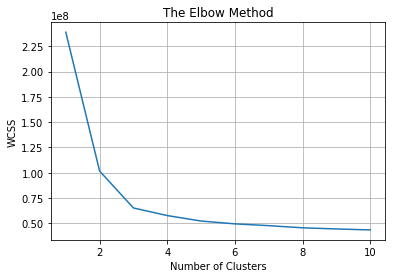

In [101]:
plt.plot(range (1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.grid()
plt.show()

In [102]:
kmeans = KMeans(n_clusters= 7, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)

In [103]:
y_kmeans = kmeans.fit(X)

In [104]:
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [105]:
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')


0.05946676609058986

In [106]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([6, 0, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 6, 0, 4, 4, 4, 6, 0, 0, 0, 6,
       0, 6, 6, 6, 0, 0, 6, 5, 0, 4, 6, 0, 0, 0, 0, 6, 0, 0, 0, 6, 6, 0,
       6, 6, 6, 0, 4, 0, 6, 0, 6, 0, 4, 2, 0, 0, 6, 6, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 0, 6, 0, 6, 6, 6, 4, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 6, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0,
       0, 6, 0, 6, 6, 0, 0, 6, 4, 4, 6, 6, 6, 0, 1, 0, 0, 0, 0, 0, 4, 0,
       6, 0, 4, 0, 0, 0, 3, 0, 4, 0, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0, 6, 0,
       6, 0, 0, 0, 5, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 0, 0, 0,
       0, 6, 6, 6, 6, 0, 0, 6, 6])

In [107]:
{i: np.where(y_kmeans == i)[0] for i in range(kmeans.n_clusters)}

{0: array([  1,   2,   4,   6,   8,  10,  13,  18,  19,  20,  22,  26,  27,
         30,  33,  34,  35,  36,  38,  39,  40,  43,  47,  49,  51,  53,
         56,  57,  60,  69,  71,  77,  78,  80,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  94,  96,  97,  98,  99, 100, 101, 102, 103,
        105, 108, 109, 110, 112, 115, 116, 123, 125, 126, 127, 128, 129,
        131, 133, 135, 136, 137, 139, 141, 142, 144, 145, 148, 149, 150,
        151, 153, 155, 156, 157, 159, 160, 161, 166, 167, 168, 169, 173,
        174, 175, 176, 181, 182], dtype=int64),
 1: array([124], dtype=int64),
 2: array([55], dtype=int64),
 3: array([138], dtype=int64),
 4: array([ 14,  15,  16,  31,  48,  54,  75, 118, 119, 130, 134, 140],
       dtype=int64),
 5: array([ 29, 158], dtype=int64),
 6: array([  0,   3,   5,   7,   9,  11,  12,  17,  21,  23,  24,  25,  28,
         32,  37,  41,  42,  44,  45,  46,  50,  52,  58,  59,  61,  62,
         63,  64,  65,  66,  67,  68,  70,  72,  73,  74,  76,  79, 